In [165]:
%pip install selenium 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\GabrieleFornabaio\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [166]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.support.wait import WebDriverWait
from datetime import datetime
import time
import csv
import pandas as pd

In [167]:
%pip install webdriver_manager

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\GabrieleFornabaio\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [168]:
# get browser, maximise window, open web page
browser = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
browser.maximize_window() #mette la pagina a schermo intero 

browser.get('https://www.tripadvisor.com/Hotel_Review-g187849-d2340336-Reviews-Armani_Hotel-Milan_Lombardy.html') #apre la pagina web

In [169]:
#wait for cookies button, click accept
cookies_wait = WebDriverWait(browser, timeout=3) 
cookies_accept = cookies_wait.until(lambda b: b.find_element('xpath', '//*[@id="onetrust-accept-btn-handler"]')) #aspetta per il pulsante
cookies_accept.click() #clicca

In [170]:
#ti permette di espandere tutte le review
expand = browser.find_element('xpath', ".//div[contains(@data-test-target, 'expand-review')]")
if expand:
    expand.click()

In [171]:
#prende le review
reviews = browser.find_elements('xpath', ".//div[@data-reviewid]")
reviews

[<selenium.webdriver.remote.webelement.WebElement (session="21081ca94305d876bf2ff391ac48c131", element="DAA6E8F03F859211612320433926CD4A_element_62")>,
 <selenium.webdriver.remote.webelement.WebElement (session="21081ca94305d876bf2ff391ac48c131", element="DAA6E8F03F859211612320433926CD4A_element_63")>,
 <selenium.webdriver.remote.webelement.WebElement (session="21081ca94305d876bf2ff391ac48c131", element="DAA6E8F03F859211612320433926CD4A_element_64")>,
 <selenium.webdriver.remote.webelement.WebElement (session="21081ca94305d876bf2ff391ac48c131", element="DAA6E8F03F859211612320433926CD4A_element_65")>,
 <selenium.webdriver.remote.webelement.WebElement (session="21081ca94305d876bf2ff391ac48c131", element="DAA6E8F03F859211612320433926CD4A_element_66")>,
 <selenium.webdriver.remote.webelement.WebElement (session="21081ca94305d876bf2ff391ac48c131", element="DAA6E8F03F859211612320433926CD4A_element_67")>,
 <selenium.webdriver.remote.webelement.WebElement (session="21081ca94305d876bf2ff391ac48

In [172]:
try:
    with open('ArmaniHotelReviews.csv', 'w', encoding='utf-8') as csvFile: #crea il file csv
        csvWriter = csv.writer(csvFile) #lo scrive

        for i in range(10): #loop per 10 pagine

            time.sleep(3) #aspetta 3 secondi prima di svolgere l'azione

            reviews = browser.find_elements('xpath', ".//div[@data-reviewid]") #cerca le review

            for review in reviews: #loop per ogni review
                
                rating_bubble = review.find_element('xpath', ".//span[contains(@class, 'ui_bubble_rating bubble_')]") #prende le review
                score = rating_bubble.get_attribute("class").split("_")[3] #prende gli score delle review

                date_obj = review.find_element('xpath', ".//span[@class='teHYY _R Me S4 H3']")
                date_rec = date_obj.text.replace("Date of stay: ", '') #cerca e estrapola la data
                date = datetime.strptime(date_rec, '%B %Y') #sistema la data

                title = review.find_element('xpath', ".//div[contains(@data-test-target, 'review-title')]").text #cerca e estrapola il titolo della review

                comment = review.find_element('xpath', ".//span[@class='QewHA H4 _a']").text.replace("\n", " ") #cerca e estrapola il commento della review

                csvWriter.writerow([score, date.year, date.month, title, comment]) #scrive il csv

            browser.find_element('xpath', './/a[@class="ui_button nav next primary "]').click() #va avanti di pagina
finally:
    browser.quit() #chiude il sito
        

In [173]:
df = pd.read_csv("ArmaniHotelReviews.csv", names = ["Valutazione", "Anno", "Mese", "Titolo", "Recensione" ]) #legge il csv e mette l'intestazione

df.head(20) #prende le prime 20 righe
#df.describe() #--per le statistiche

,Valutazione,Anno,Mese,Titolo,Recensione
0,50,2023,8,EB,"Everything is fine, except for the cold feel o..."
1,30,2023,7,First class team,The team at the Armani were amongst the best I...
2,50,2023,7,Modernist Milano,The Armani is a strikingly modern hotel in the...
3,50,2023,6,Modern luxurious stay with very friendly staff,We stayed in this hotel for 5 nights to explor...
4,50,2023,5,Better than heaven a true testament of Armani ...,No question this is the only place to stay in ...
5,50,2023,5,Outstanding time at Armani in Milan,Fantastic experience at the Armani Hotel in Mi...
6,40,2023,4,armani hotel milano,"location was great, staff not so great, asked ..."
7,50,2023,3,"Exceptional service, design and amenities",Exceptional hotel -- the service and amenities...
8,50,2023,3,"Excellet location, service and design","The Armani hotel is beautiful, modern and eleg..."
9,50,2022,3,Greatest Experience in This Stylish and Well D...,I stayed in Armani Hotel Milano a couple of ti...


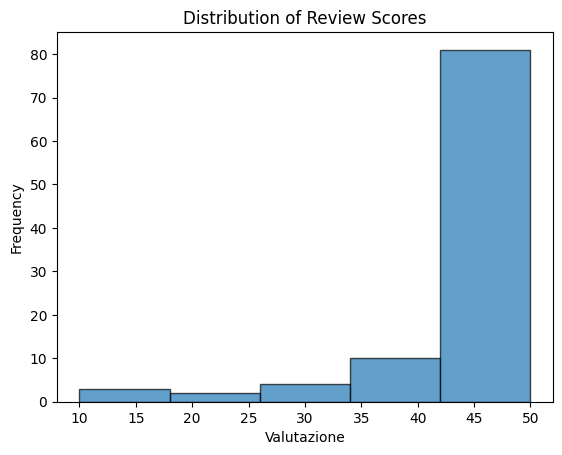

In [174]:
import matplotlib.pyplot as plt


plt.hist(df['Valutazione'], bins=5, edgecolor='k', alpha=0.7) #guarda solo la valutazione 
plt.xlabel('Valutazione') #asse X
plt.ylabel('Frequency') #asse Y
plt.title('Distribution of Review Scores') #titolo
plt.show() #mostra il grafico

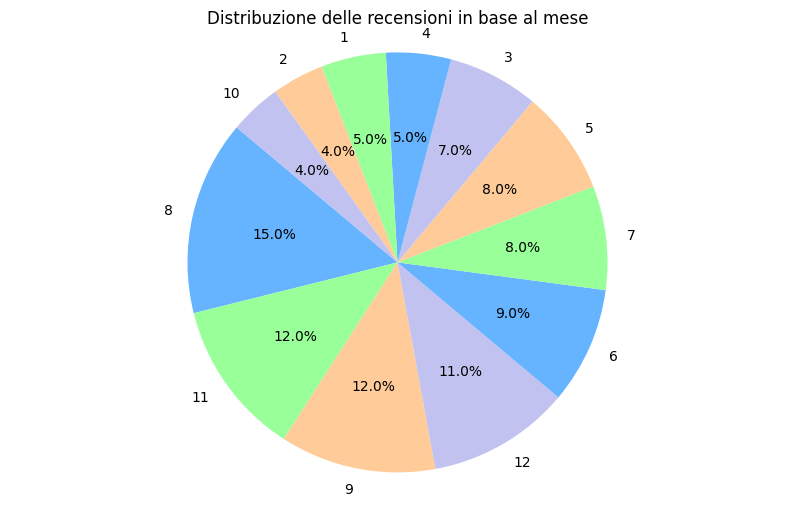

In [175]:


# Conta le occorrenze di ciascuna categoria nella seconda colonna
conteggio_categorie = df.iloc[:, 2].value_counts()

# Crea un grafico a torta per visualizzare le categorie
plt.figure(figsize=(10, 6))
plt.pie(conteggio_categorie, labels=conteggio_categorie.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Distribuzione delle recensioni in base al mese')
plt.axis('equal')  # Garantisce che il grafico sia un cerchio
plt.show()

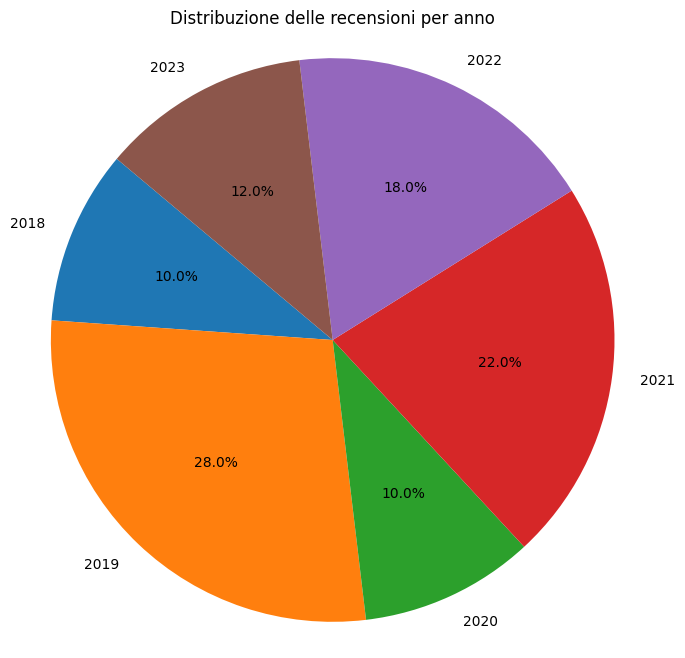

In [176]:


# Estrai gli anni dalla colonna in posizione 1
anni = df.iloc[:, 1]

# Conta il numero di recensioni per ciascun anno
anni_counts = anni.value_counts().sort_index()

# Crea un grafico a torta
plt.figure(figsize=(8, 8))
plt.pie(anni_counts.values, labels=anni_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Per mantenere il grafico a forma di cerchio
plt.title('Distribuzione delle recensioni per anno')
plt.show()

In [177]:
%pip install seaborn
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\GabrieleFornabaio\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


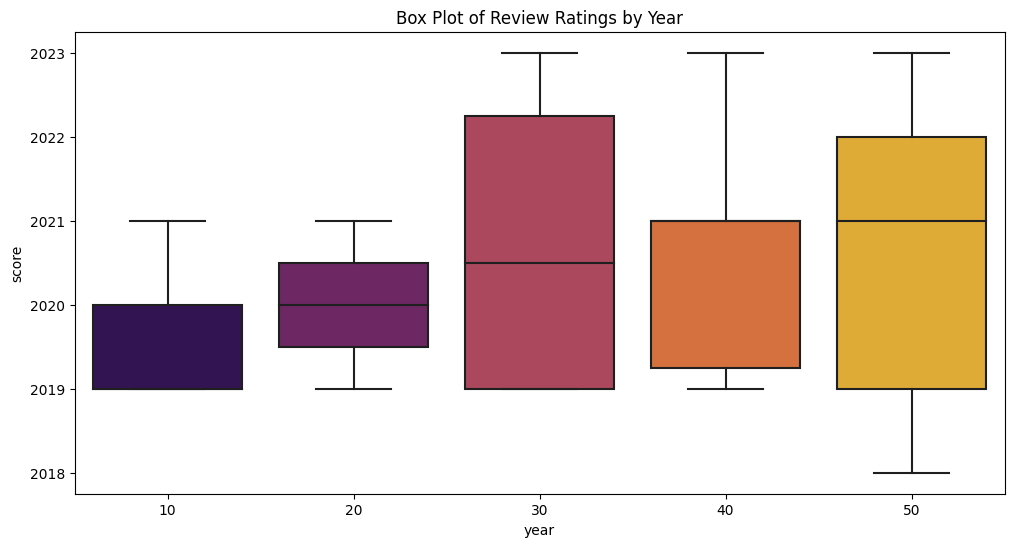

In [178]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Valutazione', y='Anno', palette='inferno')
plt.xlabel('year')
plt.ylabel('score')
plt.title('Box Plot of Review Ratings by Year')
plt.show()

In [179]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\GabrieleFornabaio\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


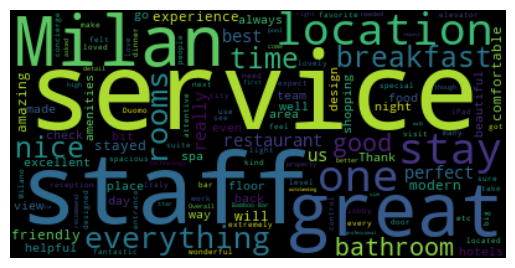

In [180]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.update(['armani', 'hotel', 'room'])
reviews = ' '.join(review for review in df.Recensione)
wordcloud = WordCloud(stopwords=stopwords).generate(reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

C:\Users\GabrieleFornabaio\AppData\Local\Temp\ipykernel_28636\2737207466.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


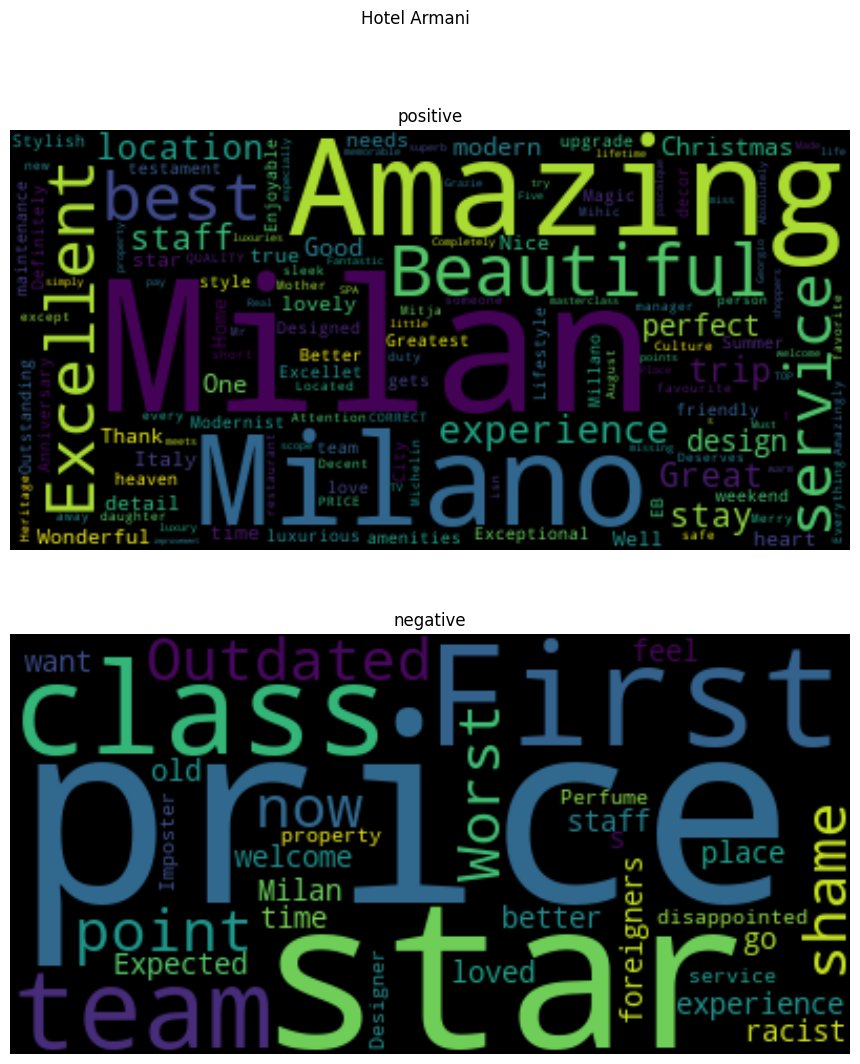

In [181]:
df['sentiment'] = df['Valutazione'].apply(lambda rating : +1 if rating > 30 else -1)

positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

pos = ' '.join(review for review in positive.Titolo)
wordcloud_pos = WordCloud(stopwords=stopwords).generate(pos)
neg = ' '.join(review for review in negative.Titolo)
wordcloud_neg = WordCloud(stopwords=stopwords).generate(neg)

fig, axes = plt.subplots(2,1, figsize = (12,12))
axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('positive')
axes[1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('negative')
fig.suptitle('Hotel Armani')
fig.show()
